In [1]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation


(x_train, y_train), (x_test, y_test) = cifar100.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)






In [2]:
model = Sequential()
x_shape=[32, 32, 3]
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True),
              metrics=['accuracy'])


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)




In [3]:
batch_size = 128
epochs = 30

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)


model.save_weights('cifar100vgg.h5')

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))





Epoch 1/30



390/390 [==============================] - 351s 889ms/step - loss: 4.9907 - accuracy: 0.0249 - val_loss: 4.5825 - val_accuracy: 0.0206
Epoch 2/30
390/390 [==============================] - 403s 1s/step - loss: 4.5315 - accuracy: 0.0444 - val_loss: 4.3762 - val_accuracy: 0.0392
Epoch 3/30
390/390 [==============================] - 430s 1s/step - loss: 4.3334 - accuracy: 0.0585 - val_loss: 4.7914 - val_accuracy: 0.0438
Epoch 4/30
390/390 [==============================] - 419s 1s/step - loss: 4.2120 - accuracy: 0.0696 - val_loss: 4.5655 - val_accuracy: 0.0444
Epoch 5/30
390/390 [==============================] - 440s 1s/step - loss: 4.1134 - accuracy: 0.0840 - val_loss: 4.6953 - val_accuracy: 0.0455
Epoch 6/30
390/390 [==============================] - 368s 942ms/step - loss: 4.0698 - accuracy: 0.0904 - val_loss: 4.1997 - val_accuracy: 0.0726
Epoch 7/30
390/390 [==============================] - 363s 930ms/step - loss: 3.9388 - accuracy: 0.1034 - val_loss: 5.0104 - val_accuracy: 0.0769
E

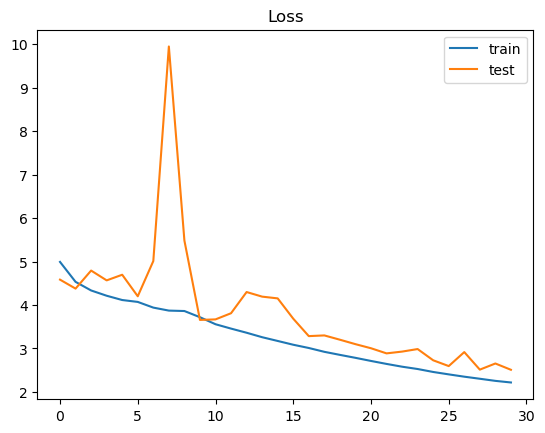

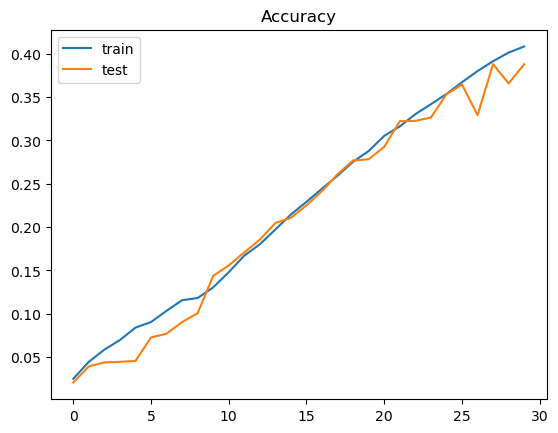